In [1]:
from ela_feature_definition import ela_feature_names
import pandas as pd
import random
import numpy as np

In [2]:
def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(42)

In [3]:
ela = pd.read_csv('data/aggregated_ela_representation_dropna.csv',index_col=[0,1,2])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ela_scaled=scaler.fit_transform(ela)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,25))
visualizer.fit(ela_scaled)     
visualizer.show()

kmeans = KMeans(n_clusters=visualizer.elbow_value_)
ela['kmeans_cluster']=kmeans.fit_predict(ela_scaled)
ela.groupby('kmeans_cluster').count()


In [4]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

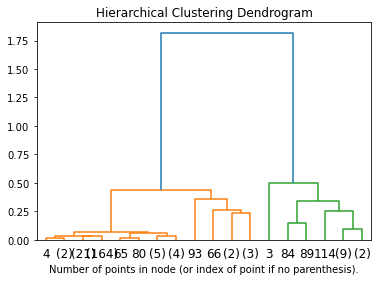

In [6]:
metric='cosine'
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity =metric
                                           ,linkage='average')

agglomerative = agglomerative.fit(ela)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

In [7]:
from sklearn.cluster import *
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import *
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from pathlib import Path
clustering_results={}
df=ela
for i in range(2, 30):
    results_for_cluster={}
    cluster_name = f'cluster_{i}'
    labels =  AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='average').fit(df).labels_
    results_for_cluster['labels'] = labels
    samples_per_cluster={k[0]:v for k,v in pd.DataFrame(labels).value_counts().to_dict().items()}
    results_for_cluster['samples_per_cluster']=samples_per_cluster
    results_for_cluster['silhouette_score'] = metrics.silhouette_score(df, labels, metric='cosine')
    sample_silhouette_values = metrics.silhouette_samples(df, labels, metric='cosine')
    clustering_results[cluster_name]=results_for_cluster

In [8]:
clustering_results_df=pd.DataFrame(clustering_results).T

In [9]:
clustering_results_df

,labels,samples_per_cluster,silhouette_score
cluster_2,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","{1: 206, 0: 15}",0.963882
cluster_3,"[0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{0: 206, 1: 14, 2: 1}",0.92756
cluster_4,"[3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 1: 14, 0: 7, 2: 1}",0.907274
cluster_5,"[3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 0: 14, 1: 6, 2: 1, 4: 1}",0.899135
cluster_6,"[3, 3, 1, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 1: 12, 0: 6, 2: 2, 4: 1, 5: 1}",0.902641
cluster_7,"[3, 3, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 0: 12, 1: 5, 2: 2, 4: 1, 5: 1, 6: 1}",0.894103
cluster_8,"[3, 3, 1, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 1: 11, 0: 5, 2: 2, 4: 1, 5: 1, 6: 1, ...",0.893567
cluster_9,"[3, 3, 1, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{3: 199, 1: 11, 2: 3, 0: 2, 8: 2, 4: 1, 5: 1, ...",0.88007
cluster_10,"[1, 1, 0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","{1: 199, 0: 11, 2: 3, 3: 2, 4: 1, 5: 1, 6: 1, ...",0.872369
cluster_11,"[0, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{0: 199, 4: 9, 2: 3, 1: 2, 3: 2, 5: 1, 6: 1, 7...",0.879424


In [10]:
selected_cluster_counts = [11,15]

In [11]:
metric='cosine'
for cluster_count in selected_cluster_counts:
    agglomerative = AgglomerativeClustering(n_clusters=cluster_count,affinity =metric ,linkage='average')
    labels=agglomerative.fit(ela).labels_
    elements_per_cluster = pd.DataFrame(labels).value_counts()
    print(elements_per_cluster)
    clusters_with_2_or_less_elements=[x[0] for x in elements_per_cluster[elements_per_cluster<=2].index]
    print(clusters_with_2_or_less_elements)
    ela[f'clustering_{cluster_count}_clusters']=labels
 
    diverse_functions=ela[ela[f'clustering_{cluster_count}_clusters'].isin(clusters_with_2_or_less_elements)]
    print(diverse_functions[f'clustering_{cluster_count}_clusters'])

0     199
4       9
2       3
1       2
3       2
5       1
6       1
7       1
8       1
9       1
10      1
dtype: int64
[1, 3, 5, 6, 7, 8, 9, 10]
suite  fid  iid
bbob   1    3       3
            4       5
       14   2       6
       17   2       1
            5       9
       18   5       8
       19   1       3
            4      10
       22   3       1
       23   5       7
Name: clustering_11_clusters, dtype: int64
0     188
1       9
4       9
2       2
3       2
5       2
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
dtype: int64
[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
suite  fid  iid
bbob   1    3       3
            4       7
       14   1       2
            2      13
       16   5       5
       17   1       2
            2      14
            5       9
       18   5      11
       19   1       3
            4      10
       22   3       6
       23   1       5
            2      12
            5       8
Name: clustering_15_c

In [12]:
ela.columns

Index(['ela_level.mmce_qda_50', 'ic.eps.max', 'disp.ratio_mean_02',
       'pca.expl_var_PC1.cor_x', 'ela_meta.lin_simple.intercept',
       'ela_level.mmce_lda_25', 'disp.diff_median_02', 'ela_level.mmce_qda_25',
       'ela_level.lda_qda_25', 'disp.diff_median_10', 'ela_level.lda_mda_25',
       'ela_level.lda_qda_50', 'disp.diff_median_25', 'ela_level.lda_mda_50',
       'ela_distr.number_of_peaks', 'disp.ratio_mean_05', 'disp.diff_mean_05',
       'ela_level.lda_mda_10', 'ela_distr.skewness', 'pca.expl_var.cov_x',
       'pca.expl_var_PC1.cov_init', 'ela_level.mmce_lda_50',
       'disp.ratio_median_10', 'disp.ratio_median_25', 'disp.diff_mean_02',
       'ic.m0', 'ela_level.lda_qda_10', 'disp.ratio_median_05',
       'disp.diff_mean_25', 'ela_level.mmce_lda_10', 'ela_level.qda_mda_25',
       'ela_meta.lin_simple.coef.min', 'disp.diff_median_05',
       'disp.ratio_mean_25', 'pca.expl_var.cor_init', 'pca.expl_var.cov_init',
       'ela_level.qda_mda_50', 'ic.h.max', 'ela_meta.lin_

In [13]:
ela.to_csv('data/ela_features_with_clustering_11_15.csv')